<a href="https://colab.research.google.com/github/crzysab/Projek-DQLab/blob/main/Data_Quality_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modules

In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling

Membaca Data

In [ ]:
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

In [ ]:
# Cetak tipe data di setiap kolom retail_raw
retail_raw.dtypes

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object

In [ ]:
retail_raw.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN


Descriptive Statistics - Part 1

Length

Fungsi len menghitung jumlah pengamatan dalam suatu series/column. 
Fungsi len akan menghitung semua pengamatan, terlepas dari apakah ada null-value atau tidak (include missing value).

In [ ]:
# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

Length kolom city: 5000


In [ ]:
# Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:', length_product_id)

Length kolom product_id: 5000


Descriptive Statistics - Part 2

Count

Fungsi count menghitung jumlah pengamatan non-NA/non-null dalam suatu series/column. Di lain pihak, fungsi len akan hanya menghitung jumlah elemen dari kolom baik kolom bersangkutan memiliki atau tidak memiliki missing value (include missing value).

In [ ]:
# Count kolom city
count_city = retail_raw['city'].count()
print('Count kolom count_city:', count_city)

Count kolom count_city: 4984


In [ ]:
# Count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:', count_product_id)

Count kolom product_id: 4989


Descriptive Statistics - Part 3

Missing Value

In [ ]:
# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city*100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

Persentase missing value kolom city: 0.3%


In [ ]:
# Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id)
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom product_id: 0.2%


Descriptive Statistics - Part 4

Maximum, Minimum, Mean, Median, Modus dan Standard Deviasi

In [ ]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.442025010811317


In [ ]:
# Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())


Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242863


Descriptive Statistics - Part 5

Quantile Statistics

Quantiles adalah titik potong yang membagi distribusi dalam ukuran yang sama. Jika akan membagi distribusi menjadi empat grup yang sama, kuantil yang dibuat dinamai quartile. Jika dibagi kedalam 10 sepuluh grup yang sama dinamakan percentile. Dalam kasus di bawah ini, ingin membagi distribusi menjadi empat grup atau quartile.

In [ ]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64


In [ ]:
# Quantile statistics kolom item_price
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


Descriptive Statistics - Part 6

Correlation

Korelasi adalah cara yang tepat untuk menemukan hubungan antara variabel numerik. Koefisien korelasi berkisar antara -1 hingga 1. Korelasi 1 adalah korelasi positif total, korelasi -1 adalah korelasi negatif total dan korelasi 0 adalah korelasi non-linear.

In [ ]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


Penggunaan Library Profiling

In [ ]:
#pandas_profiling.ProfileReport(retail_raw)

Data Cleansing

Data Cleansing berarti proses mengidentifikasi bagian data yang salah, tidak lengkap, tidak akurat, tidak relevan atau hilang dan kemudian memodifikasi, mengganti atau menghapusnya sesuai dengan kebutuhan.

In [ ]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool


Imputasi merupakan suatu metode treatment terhadap missing value dengan mengisinya menggunakan teknik tertentu. Bisa menggunakan mean, modus ataupun menggunakan predictive modelling.

In [ ]:
# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
retail_raw['quantity'].fillna(retail_raw.quantity.mean())


Filling the missing value (imputasi):


0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

In [ ]:
retail_raw['item_price'].fillna(retail_raw['item_price'].mean())

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64

Outliers

Outliers merupakan data observasi yang muncul dengan nilai-nilai ekstrim. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Kolom quantity

In [ ]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (5000, 9)


In [ ]:
# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1-1.5*IQR)) | (retail_raw['quantity'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4699, 9)


Kolom item_price

In [ ]:
# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (4699, 9)


In [ ]:
# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1-1.5*IQR)) | (retail_raw['item_price'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4379, 9)


Deduplikasi Data

Duplikasi data merupakan data dengan kondisi pada row-row tertentu memiliki kesamaan data di seluruh kolomnya. Tentunya ada data yang duplikat dalam dataset yang dimiliki. Kondisi duplikasi harus diatasi dengan jalan mengeliminir baris yang mengalami duplikasi, sehingga proses ini dikenal dengan deduplikasi.

In [ ]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (4379, 9)


In [ ]:
# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

In [ ]:
# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4373, 9)


In [ ]:
retail_raw.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN


Case Studi: Data Profiling

In [ ]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

In [ ]:
#Check kolom yang mengandung missing value
print('Kolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool


In [ ]:
#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

In [ ]:
#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

In [ ]:
#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

Persentase missing value kolom Quantity: 4.0%


In [ ]:
#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

In [ ]:
uncleaned_raw.isnull().any()

InvoiceNo      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool

Case Study: Data Cleansing

In [ ]:
import matplotlib.pyplot as plt

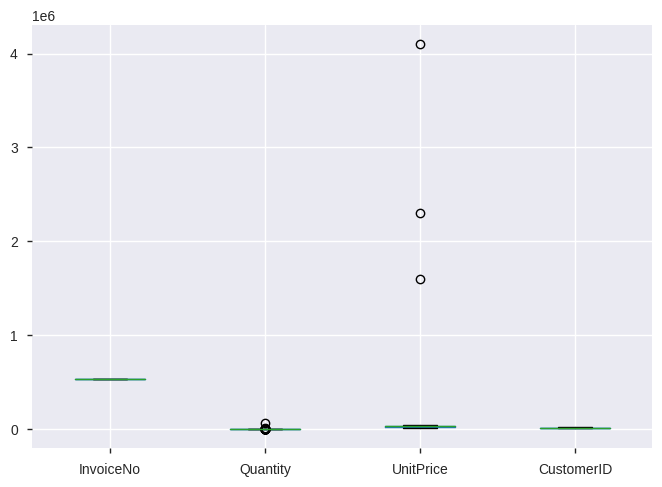

In [ ]:
#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

In [ ]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1-1.5*IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3+1.5*IQR)))]